# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [220]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [221]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [222]:
boston.keys()

['filename', 'data', 'target', 'DESCR', 'feature_names']

In [223]:
boston.data.shape

(506L, 13L)

In [224]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [225]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [226]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [227]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [228]:
print(boston.target.shape)

(506L,)


In [229]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [230]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5,1,'Relationship between CRIM and Price')

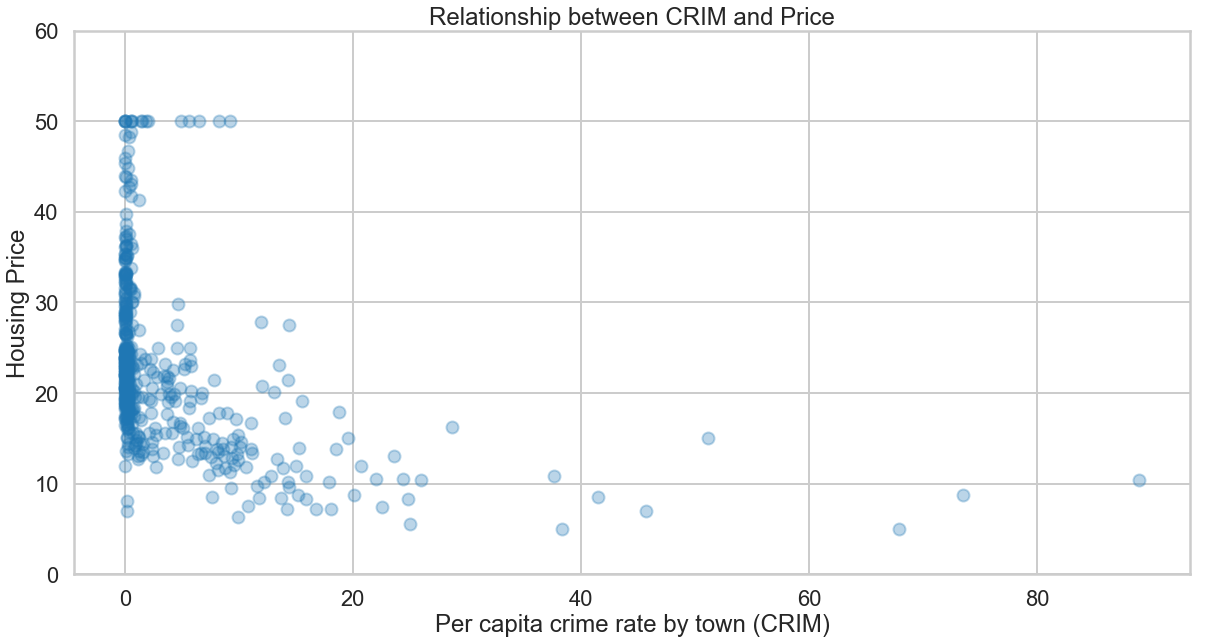

In [231]:
plt.rcParams["figure.figsize"]=20,10
plt.scatter(bos.CRIM, bos.PRICE, alpha=0.3)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.ylim([0, 60])
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

#### your turn: describe relationship
The crime rate has a negative relationsihp with the housing price, as expected -- when crime increases, housing values fall. There are two strange features in the data: a tall, thick column of points at exactly 0 per-capita crime, and a sort of panhandle or perpindicular extension at the top of the y-axis where some towns have a small but non-zero crime rate and have exactly the maximum housing price. There are also a few outliers that have very high per-capita crime rates, but these are not necessarily outside whatever the distribution is; it's possible that the data just have a long right tail.

The strong concentration of data at x=0 could indicate a hyperbolic relationship (Housing Price ~ 1 / CRIM), or it could just indicate that the crimes used included only serious crimes like murder, so that many towns had no crimes to report during the relevant period.

The panhandle of data at y = 50 is more puzzling. Perhaps the dataset artificially capped housing prices at $500,000, or perhaps there was some type of law in Boston that limited what houses could be sold for.

Text(0.5,1,'Relationship between RM and Price')

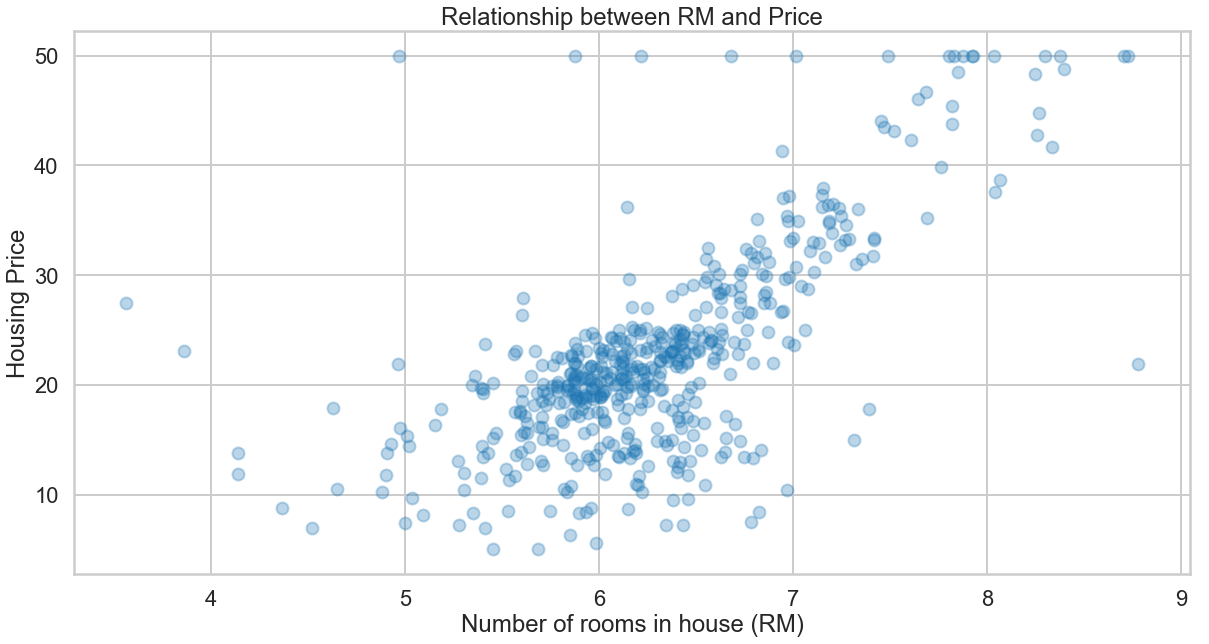

In [232]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, alpha=0.3)
plt.xlabel("Number of rooms in house (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Again, there is an odd bunching of housing prices at the y=50 line. Otherwise, this appears to be a straightforward moderately positive correlation -- as the number of rooms increases, the price does too. There are a few outliers, which might represent attractive luxury studios (at the low end) or collegiate-style dorms or shared housing (at the high end). Except for the y=50 line, all of the serious outliers are splayed to the left and right of the graph, rather than up or down.

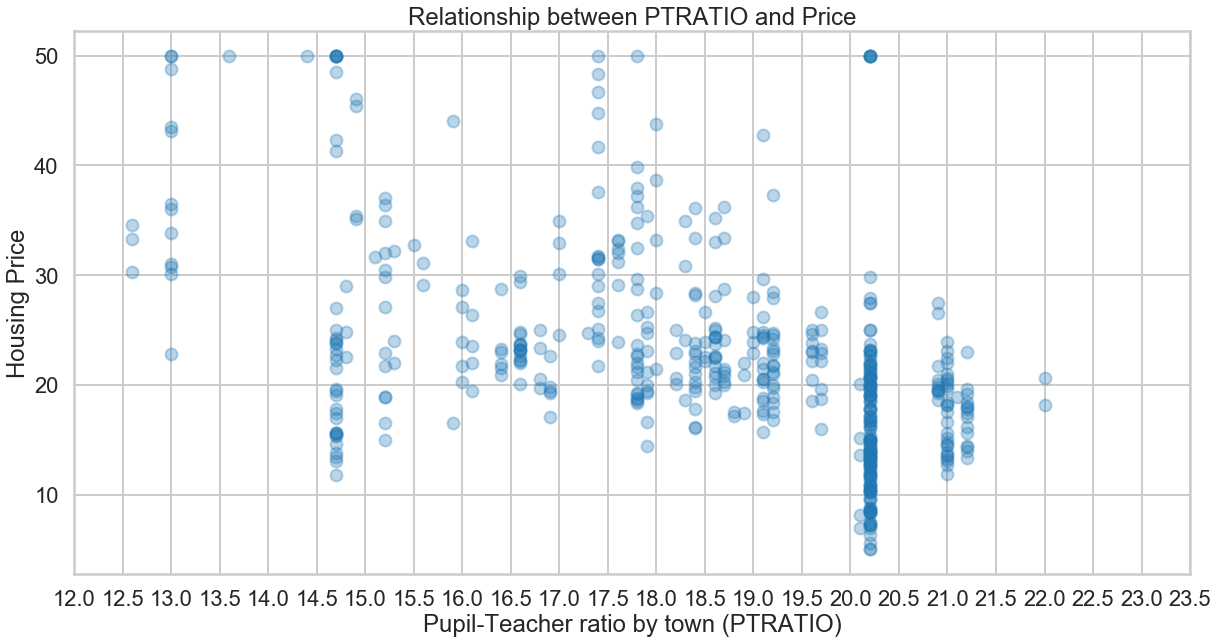

In [233]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, alpha=0.3)
plt.xlabel("Pupil-Teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.xticks(np.arange(12, 24, step=0.5))
plt.show()

This graph is a little harder to read, because the data is somewhat clustered, i.e., there are many towns that each have the same pupil-teacher ratio. It looks like a very large fraction of the data is concentrated at about x = 20.4. This could represent the largest school district, or perhaps there are several school districts that have standardized on this student-teacher ratio as the appropriate number for their public schools. There is a weak tendency for the districts with the lowest student-teacher ratios to not inlcude any towns that have lower housing prices, and a corresponding weak tendency for the districts with the highest student-teacher ratios to not include any towns that have higher average housing prices. However, neither group displays average or characteristic values that are outside the normal range for districts with  average student-teacher ratios.

Text(0.5,1,'Relationship between DIS and Price')

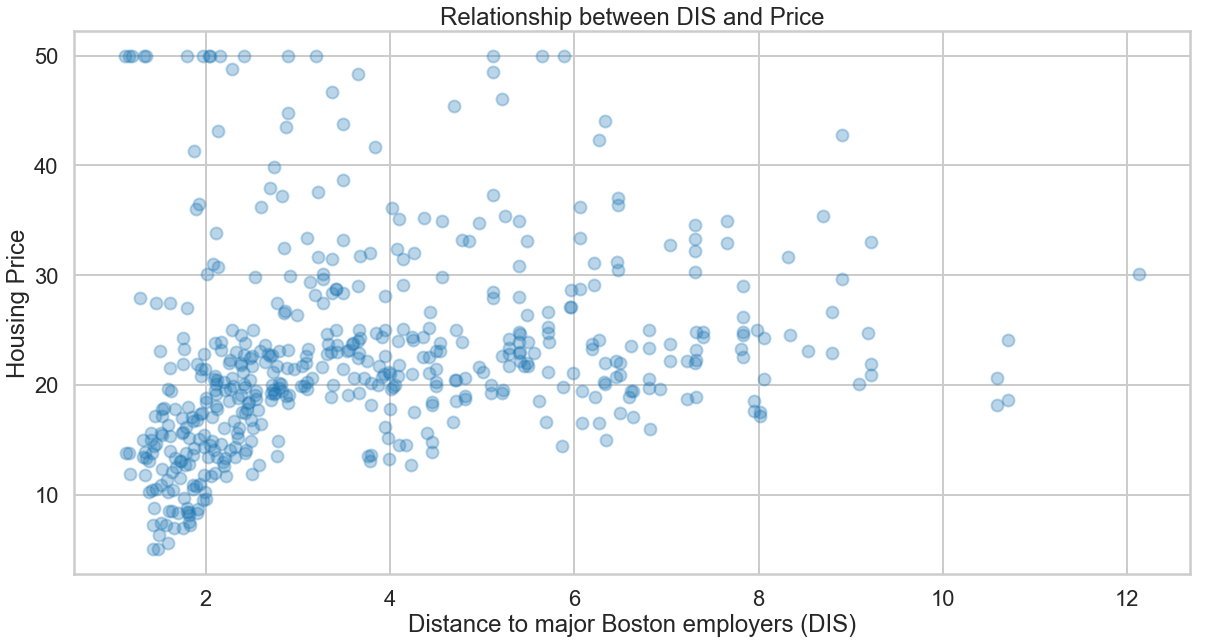

In [234]:
# your turn: create some other scatter plots
plt.scatter(bos.DIS, bos.PRICE, alpha=0.3)
plt.xlabel("Distance to major Boston employers (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

The graph of distance to major Boston employers vs. housing price is fascinating because up until about x=3, there is a strong positive correlation between distance and housing price; it looks like people prefer not to live *in* the city center and instead prefer to live in residential neighborhoods that are a few miles away from work. Then, after x=3, the graph has a sharp inflection point and becomes almost horizontal, i.e., increasing distance no longer has any predictable effect on housing prices. The implication seems to be that the increased luxury value of suburbs, on average, exactly balances the inconvenience of a longer commute to work.

There is a strong concentration of data around the y=22 line, with a sort of evaporative foam rising up from this line almomst throughout the entire graph. It is unclear why most suburban homes appear to sell for approximately $200,000 - $250,000. There is a very weak tendency for the highest-valued homes to have a distance of less than 6, but it is hard to tell whether this tendency is meaningful because of the cap on y at y=50.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

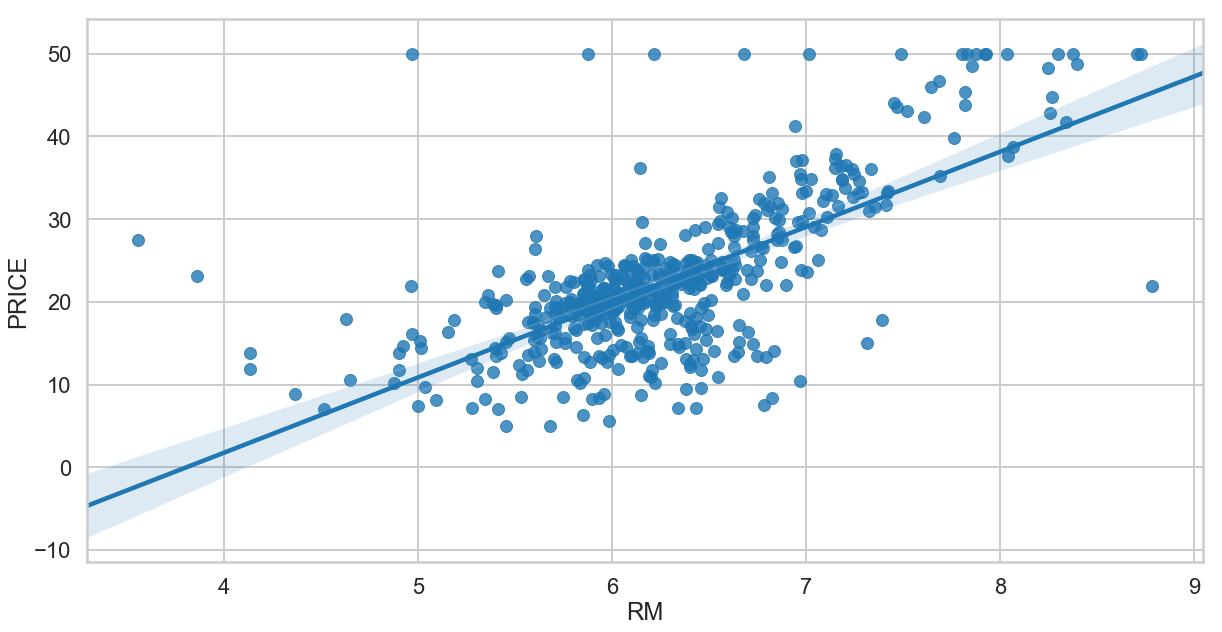

In [235]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


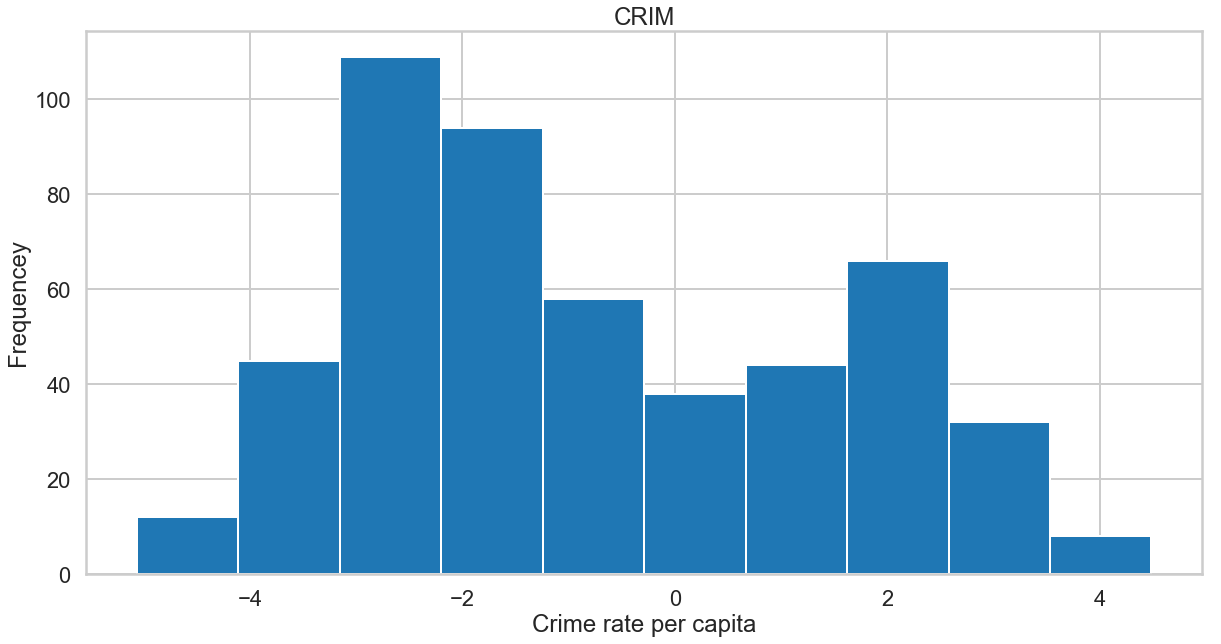

In [236]:
plt.rcParams["figure.figsize"]=20,10
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

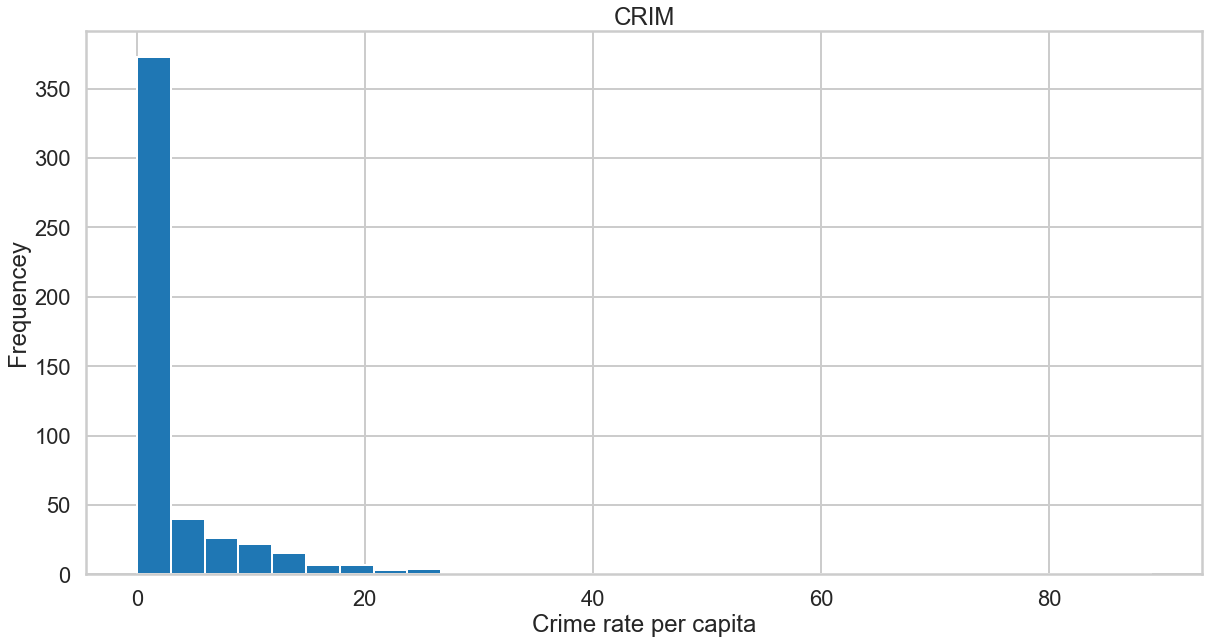

In [237]:
#your turn
plt.hist(bos.CRIM, bins=30)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The log histogram reveals that crime rate has a bimodal distribution. This is not apparent from the standard historgram, even with an increased number of bin sizes. Taking the logarithm helps extract additional information where, as here, too much of the data is clustered in the smallest bin to learn much of interest about the data.

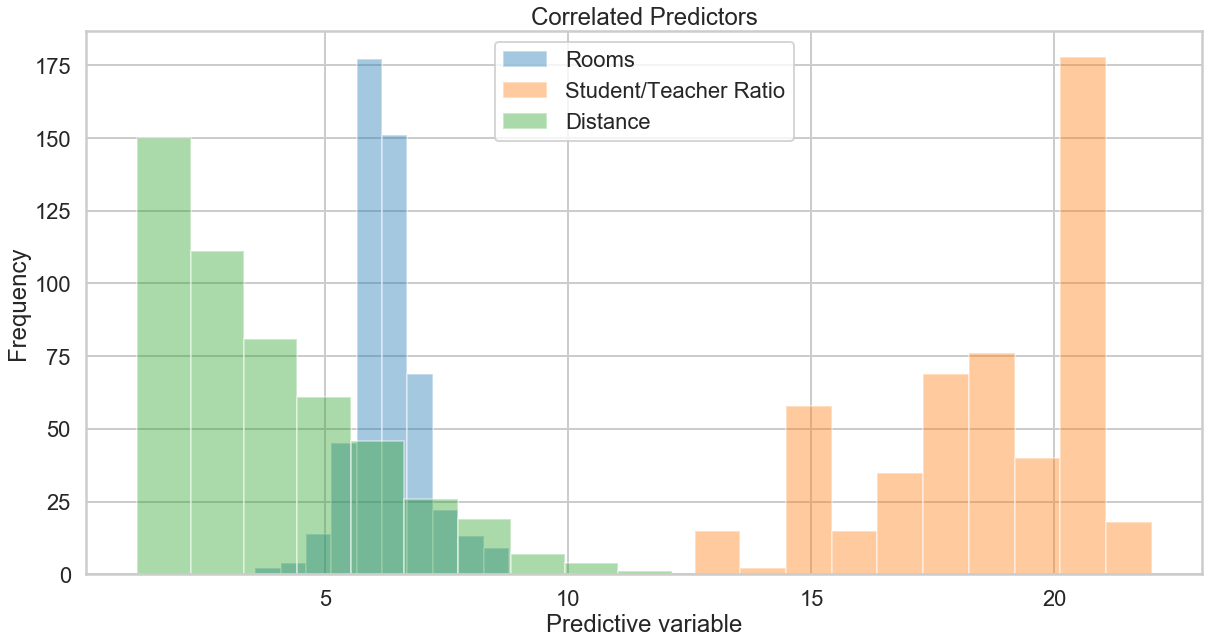

In [238]:
_ = plt.hist(bos.RM, alpha = 0.4)
_ = plt.hist(bos.PTRATIO, alpha = 0.4)
_ = plt.hist(bos.DIS, alpha = 0.4)
plt.title("Correlated Predictors")
plt.xlabel("Predictive variable")
plt.ylabel("Frequency")
plt.legend(['Rooms', 'Student/Teacher Ratio', 'Distance'])
plt.show()

The three predictive variables of rooms, student/teacher ratio, and distance from employers seem to be reasonably independent -- the frequency of distance declines steadily from a maximum of 0, the frequency of rooms is approximately normally distributed, and the frequency of student/teacher ratios is bimodal, with peaks at x=15 and x=21. To confirm that the variables are independent, I graph their standardized historgrams below.

In [239]:
# Create a database with standardized predictive variables

from sklearn import preprocessing
# Get column names first
names = bos.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_bos = scaler.fit_transform(bos)
scaled_bos = pd.DataFrame(scaled_bos, columns=names)

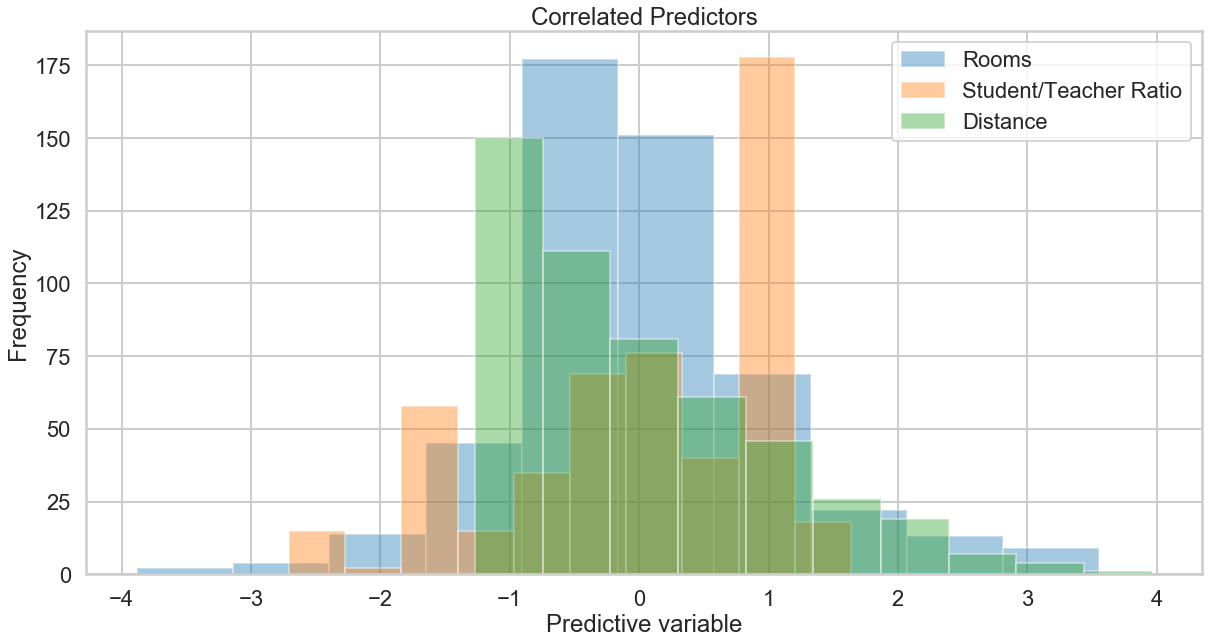

In [240]:
_ = plt.hist(scaled_bos.RM, alpha = 0.4)
_ = plt.hist(scaled_bos.PTRATIO, alpha = 0.4)
_ = plt.hist(scaled_bos.DIS, alpha = 0.4)
plt.title("Correlated Predictors")
plt.xlabel("Predictive variable")
plt.ylabel("Frequency")
plt.legend(['Rooms', 'Student/Teacher Ratio', 'Distance'])
plt.show()

Even with identical means and standard deviations, the distributions are still visually distinct.

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [241]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [242]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           2.49e-74
Time:                        16:57:34   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0,0.5,'Actual Price')

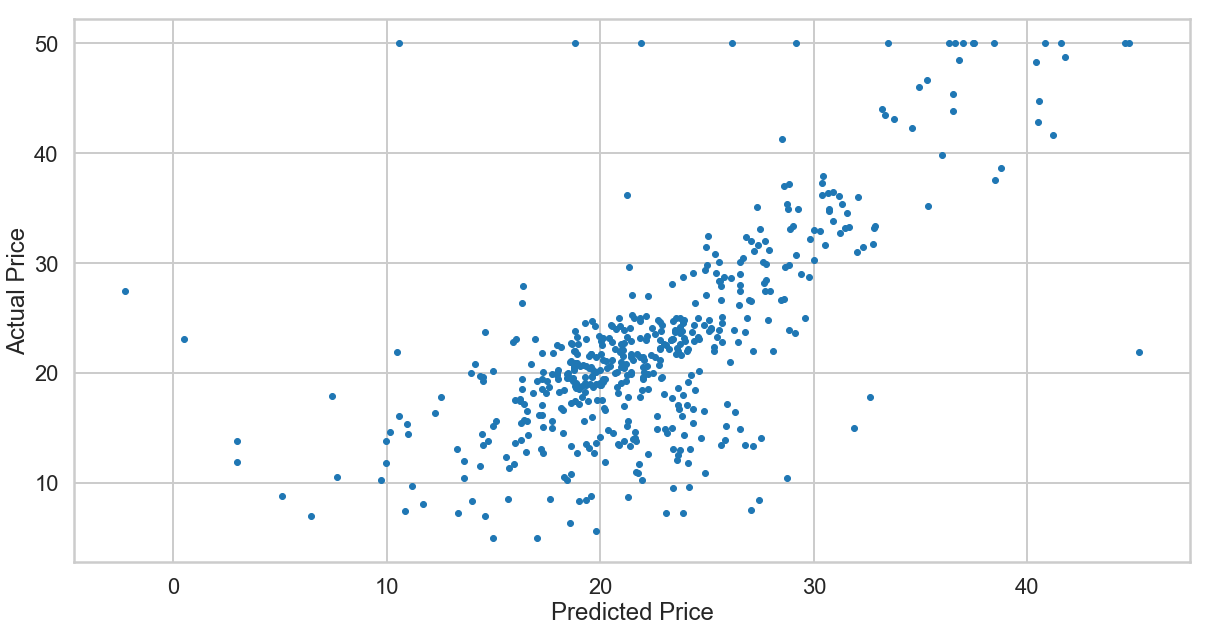

In [243]:
# your turn
plt.plot(m.fittedvalues, bos.PRICE, marker='.', linestyle='none')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')

I see a very similar problem to the one that I saw in earlier versions of the graph, which is that the model is not predicting any prices to be equal to or greater than 50. I begin to wonder whether '50' was a code used by the BOSTON dataset to indicate that the saleprice was unknown. If '50' were instead an artifiical ceiling on the price, then I would expect to see at least some predicted prices above 50 with an actual price of exactly 50, but instead, the highest predicted price is only 46.

### Fitting Linear Regression using `sklearn`


In [244]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [245]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [246]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


<b>No Intercept</b>

In this case, I see no reason not to follow the standard practice of leaving the intercept in place. It is useful to see if the prediction resulting from all variables combined is still systematically biased toward higher or lower housing prices, and it is not meaningful to speak of a theoretical house that must have zero predicted value. A regression on only the number of rooms, for example, might be conceived of as 'needing' to pass through the origin, because a house with no rooms has no market value, but what about a house with no crime? A house with a zero ratio of students-to-teachers? The variables do not have a meaningful common convergence at the origin, so it is best to leave the intercept term intact.

In [247]:
# To change the model to not fit an intercept turn, the option must be set during initialization of the 
# LinearRegression object.

lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

<b>Independently and Identically Distributed</b>

Having normally distributed residuals is a good sign that the error terms are likely to be independently and identically distributed, but it is not a guarantee. Even a relatively normal distribution could still be correlated with the variable of interest in an undesirable way. For example, the distribution [1, 2, 2, 3, 3, 3, 3, 4, 4, 5] is approximately normal, but if it these are the residuals of an independent variable with values [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] then the error terms are strongly correlated with the residuals, suggesting that the linear model is not actually appropriate.

<b>False.</b> There is no need for Y to be normally distributed to use linear regression. It is sometimes desirable to standardize or normalize the independent variables [x1, x2, x3...xn] in order to reduce the effects of having variables that exist on different scales, and the *error* terms of a regression should be normally distributed if the linear model has been wholly successful, but there is no need for the dependent variable to have a normal distribution in real life. For example, a dependent variable might be bimodally distributed, and then one of the predictive variables could represent either the square of a predictor (leading to a linear regression that includes quadratic terms as some of the linear predictors, which is valid) or one of the predictive variables could represent a categorical variable that assigns a large flat boost. 

An example of the first type of regression might be the prediction of heart attacks based on alcohol consumption -- people who have one or two drinks per day tend to have fewer heart attacks on average than people who drink nothing at all or who drink four or five drinks per day, so a regression of the form y = b1x1 + b2x2 + e, where x1 is the number of drinks per day, and x2 is the number of drinks per day squared, would probably produce a reasonably accurate estimate of y (chance of heart attack). b1 would be expected to be negative, and b2 would be expected to be positive. Y is bimodally distributed, not normally distributed, but the linear regression is still valid.

An example of the second type of regression might be the prediction of human height based on weight and gender -- human height is bimodally distributed, not normally distributed, but you can still get a reasonably accurate prediction using linear regression on weight and gender.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [248]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.4594883851


In [249]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [250]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [251]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

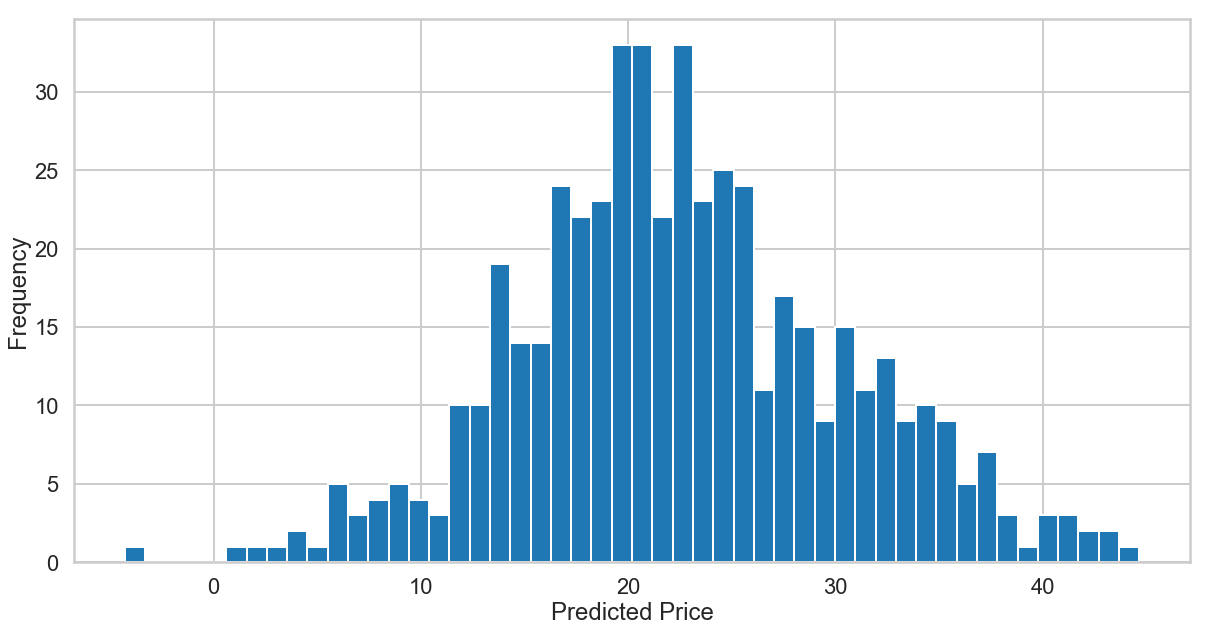

In [252]:
# your turn
predicted_prices = lm.predict(X)
plt.hist(predicted_prices, bins=50)
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.show()

The distribution is approximately normal, with center around $200,000 and a modest tendency to skew toward the left. The leftward skewe makes sensee in the context of a middle-class / working-class metropolitan area where most homes are of approximately the same value and only a few people own luxury homes, as was typical of Boston in the 1970s and 1980s.

There is one notable outlier at x = -$50,000, which is obviously incorrect; homes do not have negative values. There is also a cluster of predictions near the right-hand side of the graph, at about x = $410,000, which seems unusually common given how far toward the end of the graph it is; we would expect to see something more like n = 1 or n= 2 rather than n = 11 in a perfect normal distribution. This could be based on a series of outliers, or it could be random chance, or it could be a sign that part of the predictions have a long right tail.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [253]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [254]:
#print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [255]:
# your turn
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           1.61e-34
Time:                        16:57:36   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The R-Squared value is 0.258, suggesting that about a quarter of the variance in a home's price can be accounted for based on variations in the student-teacher ratio in the home's neighborhood.

In [256]:
bos.shape

(506, 14)

In [257]:
# F = (R2 / 1 - R2) * (N - K - 1) / K
f = (m2.rsquared / (1 - m2.rsquared)) * (506 - 1 - 1) / (1)
f

175.10554287569548

Looking up the F-statistic on a chart, an F of 175 with 1 degree of freedom in the denominator and about 1000 degrees of freedom in the numerator, the p value appears to be approximately 0.08. This does not match the prob (F-statistic) reported in the OLS Regression Results, which state that the p-value is less than (10 ^ -30).

The t-statistic is -13.23, which has as probability of less than 0.001. This does not appear to be remarkable in the context of the F-statistic; both numbers are large relative to their variance and indicate clear statistical significance.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [258]:
# your turn
bos_endog = bos[['PRICE']]
bos_exog = bos[['CRIM', 'RM', 'PTRATIO']]
bos_exog = sm.add_constant(bos_exog, has_constant='add')
mod = sm.OLS(bos_endog, bos_exog)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           6.15e-98
Time:                        16:57:36   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3707      4.034     -0.836      0.4

In [259]:
bos_exog.shape

(506, 4)

<p>The F-Statistic is 245.2, which is relatively low for a regression with three degrees of freedom in the denominator, and translates to a p-value of less than 0.001. As before, the summary reports a much lower p-value than the F-statistic chart, claiming that p is less than 10^-90.</p>

<p>The R-squared value is 0.594, suggesting that over half of the variability in the price is accounted for by variation in the independent variables that were selected for this model. All three of the variables (CRIM, RM, and PTRATIO) are statistically significant in predicting home prices, which makes sense given that these variables do not overlap in their histograms and would all be important to buyers. In practical terms, the coefficient of crime ratios was very small, only -0.2, meaning that an increase of 1 percent in the per capita crime rate in the neighborhood tends to lower the value of a house by only 2,000 dollars. An increase from the 20th percentile of crime to the 80th percentile of crime is an increase of only about 5 percent, i.e., of about 10,000 dollars. By contrast, adding just one extra room (which is also a jump from the 20th to the 80th percentile) tends to increase the value of a house by 70,000 dollars. The size of a house is therefore of more practical significance than the crime rate of the house's neighborhood.</p>

In [260]:
np.percentile(bos.CRIM, [20, 80])

array([0.06417, 5.58107])

In [261]:
np.percentile(bos.RM, [20, 80])

array([5.837, 6.75 ])

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [262]:
# Setup model with additional variables
full_boston = bos[['CRIM', 'RM', 'PTRATIO', 'DIS', 'NOX']]
full_boston = sm.add_constant(full_boston, has_constant='add')
mod = sm.OLS(bos_endog, full_boston)
result_full = mod.fit()
print(result_full.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     176.1
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          8.11e-108
Time:                        16:57:36   Log-Likelihood:                -1583.3
No. Observations:                 506   AIC:                             3179.
Df Residuals:                     500   BIC:                             3204.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6319      5.033      4.298      0.0

In [263]:
# Compute the residual sum of squares for both models
full_rss = np.sum((bos.PRICE - result_full.predict(full_boston)) ** 2)
full_rss

15469.96380696258

In [264]:
reduced_rss = np.sum((bos.PRICE - result.predict(bos_exog)) ** 2)
reduced_rss

17328.237120080248

In [265]:
# Compute the degrees of freedom for both models
def calc_df((n, k)):
    return n - k - 1
full_boston_df = calc_df(full_boston.shape)
full_boston_df

499

In [266]:
reduced_boston_df = calc_df(bos_exog.shape)
reduced_boston_df

501

In [267]:
F_stat = (reduced_rss - full_rss / reduced_boston_df - full_boston_df) / (full_rss / full_boston_df)
F_stat

541.8487864647077

In [268]:
result_full.aic - result.aic

-53.39914697655695

### Conclusion for Part 4

The F-statistic is impressively high for the nested model, and the AIC value is lower, so it is very likely that adding the two additional variables of distance from employment centers and Nitrous Oxide content of the air improves the model.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

### Fitted vs. Residuals Plot

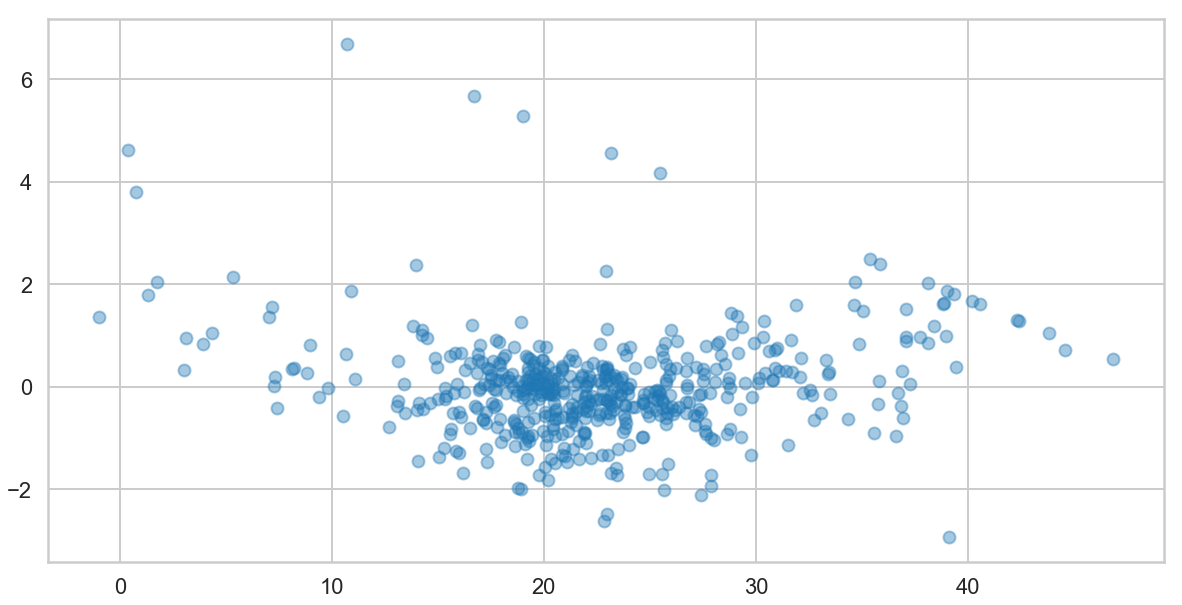

In [269]:
# Your turn.
predictions = result.fittedvalues
residuals = result.resid_pearson
plt.scatter(predictions, residuals, alpha=0.4)

The scatterplot above shows a weak but distinct curve, with residuals at either end of the x-axis tending to be near +1 sigma, and residuals near the center of the x-axis tending to be near -1 sigma. This strongly suggests that the true relationship involves at least one quadratic term, i.e., that buyers are responding to the square of the crime rate, or the square of the student-teacher ratio, or something similar. The data violates the model assumption that the residuals are independent of the predictive variables, because it is visually apparent that the residuals are in fact correlated with the predictive variables here.

### Quantile Plot

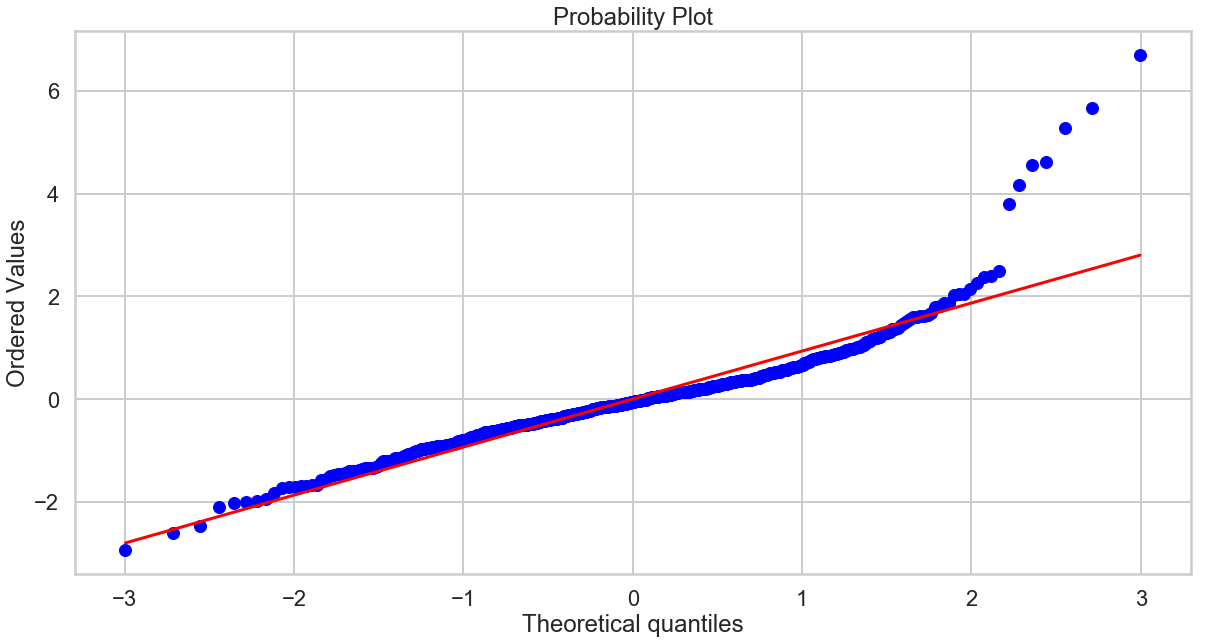

In [270]:
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

The quantile plot shows an extreme spike on the right-hand side of the x-axis, indicating unexpectedly repeated values in that area. This is further confirmation that the repetition of the '50' home price value is unnatural, i.e., the most plausible cause of the distribution shown here is that there are more values of '50' than would be ordinarily expected.

The fitted vs. residual plot helps give a sense of whether the residuals show any pattern or are truly random. Very unusual patterns in the data would still be apparent from a fitted vs. residual plot, even if the pattern has no overall net tendency to bias the shape of the distribution. However, one disadvantage to the fitted vs. residual plot is that it does not always tell us at a glance what the problem is -- it can be difficult to visually translate the fitted vs. residual plot into a crisp description of how, specifically, the data differs from a normal distribution.

By contrast, the quantile-quantile plot shows exactly where and how the data differs from a normal distribution, but it might not pick up on all of the patterns within the residuals or show where variables are inappropriately interdependent. For example, here, the Q-Q plot shows that there are unexpectedly high values on the right-hand side of the plot (which is not apparent from the fitted vs. residual plot), but does not show the quadratic tendency in the errors (which is apparent from the fitted vs. residual plot).

### Leverage Plot

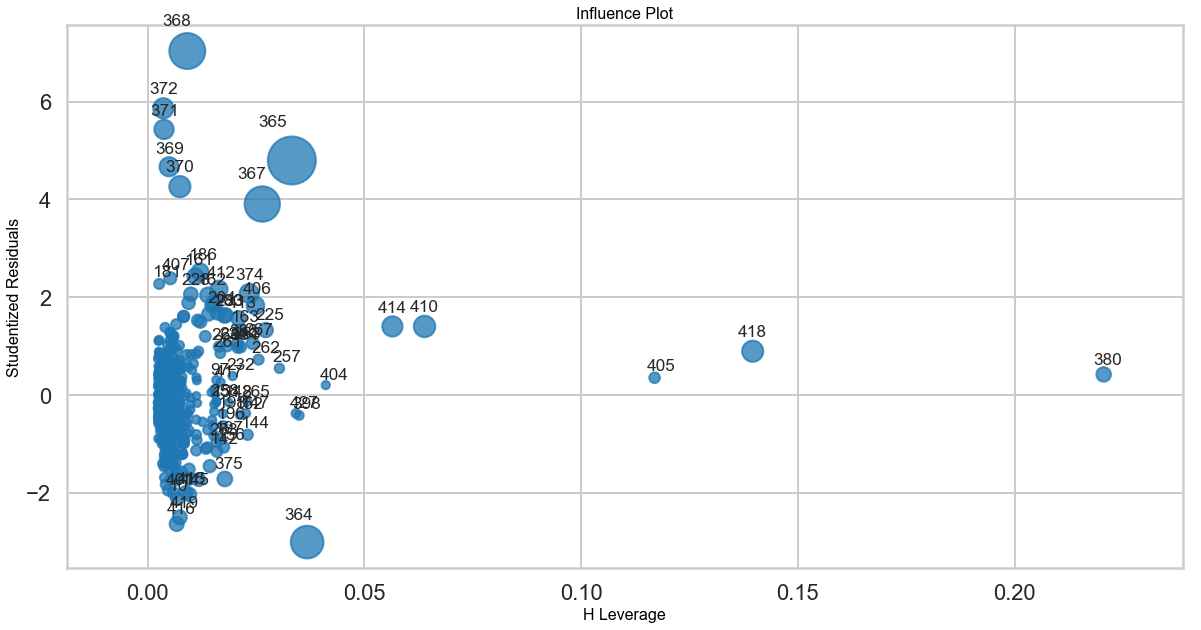

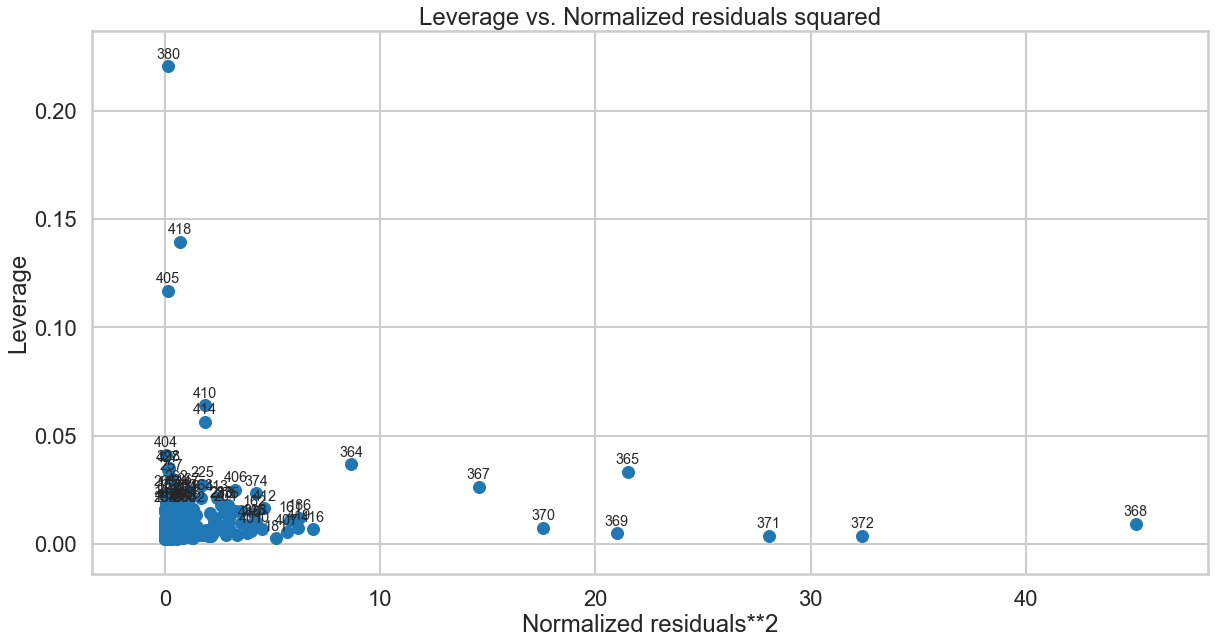

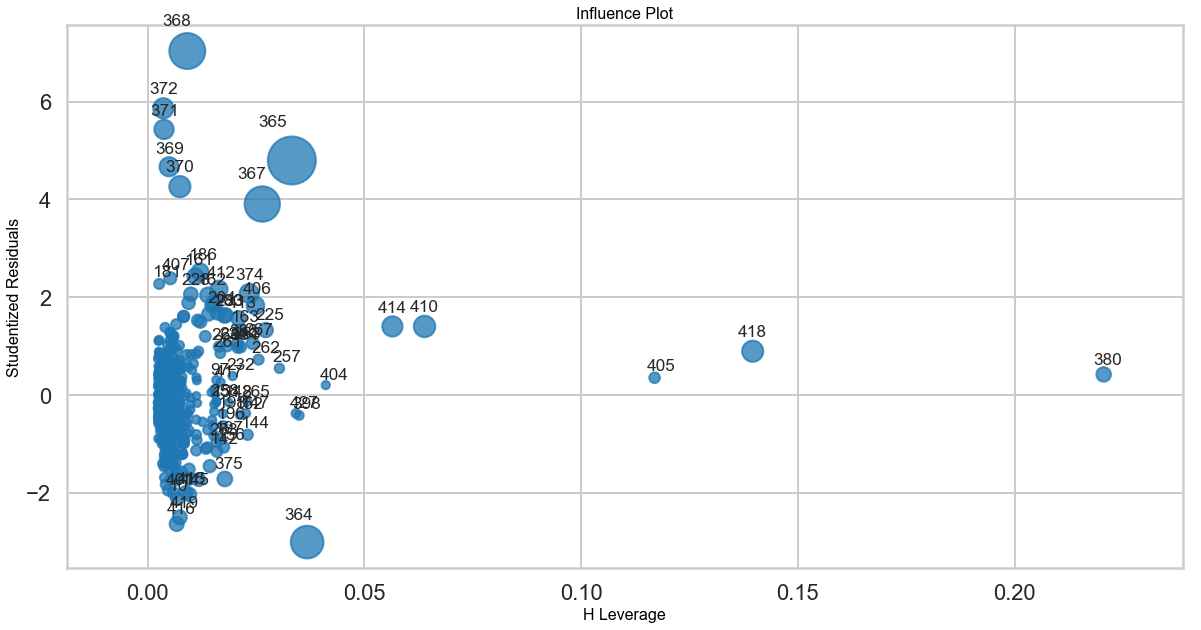

In [271]:
from statsmodels.graphics.regressionplots import *
plt.rcParams.update({'font.size': 12})
plot_leverage_resid2(result)
influence_plot(result)

In [272]:
#The points with highest leverage are 380, 405, and 418. Let's take a closer look at those rows.
bos.loc[[380, 405, 418]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8


In [273]:
np.percentile(bos.CRIM, [50, 75, 90, 95, 98, 99.5])

array([ 0.25651  ,  3.6770825, 10.753    , 15.78915  , 25.02166  ,
       59.108675 ])

All three of these high-leverage points have extremely high crime rates, ordinary student-teacher ratios, and ordinary numbers of rooms. They also have quite low prices. Therefore, it may be that these three towns are carrying an unreasonably large fraction of the explanatory weight in the three-variable model. It could be that these three neighborhoods are high-crime and low-priced for some unrelated reason, e.g., perhaps they are near a toxic industrial area, or perhaps there are no legal jobs in these towns and no public transit or easy access to highways to get to areas that do have legal jobs.

Meanwhile, points 364 and 368 are the most pronounced outliers. Let's take a closer look at those two points.

### Identify and discuss outliers

In [274]:
bos.loc[[364, 368]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
364,3.47428,0.0,18.1,1.0,0.718,8.78,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
368,4.89822,0.0,18.1,0.0,0.631,4.97,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0


It appears that row 364 is an outlier because it has low crime and many rooms per building but a standard price, and that row 368 is an outlier becuase it has few rooms per building but still has the highest possible price. Both rows have ordinary student-teacher ratios.

These data points are not necessarily a problem for the model, because we expect rooms per building to be an imperfect estimator of real estate value; some buildings will have many 'rooms' that are very small or that are part of shared housing, whereas other buildings will have few 'rooms' that are part of an open-plan luxury studio where each room is the equivalent of a kitchen, living room, and dining room combined. A measure of square footage per apartment might provide a less variable estimate.

### Re-run the regression without outliers or high-leverage points

In [275]:
bos_no_outliers = bos.drop([364, 368, 380, 405, 418])
bos_endog_2 = bos_no_outliers[['PRICE']]
bos_exog_2 = bos_no_outliers[['CRIM', 'RM', 'PTRATIO']]
bos_exog_2 = sm.add_constant(bos_exog_2, has_constant='add')
mod_2 = sm.OLS(bos_endog_2, bos_exog_2)
result_2 = mod_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     278.8
Date:                Sun, 27 Oct 2019   Prob (F-statistic):          4.33e-106
Time:                        16:57:40   Log-Likelihood:                -1569.0
No. Observations:                 501   AIC:                             3146.
Df Residuals:                     497   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6062      3.890     -1.698      0.0

If anything, the explanatory power of the model only increases when the outliers and high-leverage points are removed; the R-square dhas increased from 0.57 to 0.62, and all threee of the variables are still highly statistically significant and have coefficients of regression that are large enough to be of some practical significance given the scales of these variables. Therefore, we can be reasonably confident that the conclusions of this model are not being inappropriately driven by a handful of odd towns -- the model's conclusions are broadly representative of the towns in the Boston area.